# imports

In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import string
import re
import tensorflow as tf
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
from mlxtend.evaluate import PredefinedHoldoutSplit
from sklearn.metrics import classification_report, confusion_matrix
import pickle
from sklearn.ensemble import RandomForestClassifier
import os
from transformers import BertConfig, BertTokenizer
from transformers import BertModel
from transformers import get_linear_schedule_with_warmup
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader,RandomSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
import pickle
from imblearn.over_sampling import RandomOverSampler
from collections import OrderedDict
from sklearn.metrics import roc_curve, auc
import csv

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# loading datasets

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/datasets/labeled_tweets.csv')

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/datasets/public_data_labeled.csv')

In [ ]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [ ]:
df1 = df1.dropna()
df2 = df2.dropna()

In [ ]:
dataset=pd.concat([df1,df2],axis=0)
dataset=dataset.reset_index()
dataset

index  Unnamed: 0          label  \
0          0         0.0  Non-offensive   
1          1         1.0  Non-offensive   
2          2         2.0  Non-offensive   
3          3         3.0  Non-offensive   
4          4         4.0  Non-offensive   
...      ...         ...            ...   
35250  24778         NaN      Offensive   
35251  24779         NaN  Non-offensive   
35252  24780         NaN      Offensive   
35253  24781         NaN      Offensive   
35254  24782         NaN  Non-offensive   

                                               full_text  
0      I'm not really sure yet if I feel comfortable ...  
1      MUCH SELF AWARE, WOW @Prit1010: This made me c...  
2      The more companies I talk to, the more I reali...  
3      @scaryjen @Kirtaner @DigiRanger1994 we aren't ...  
4       Not enough Lemon in their lemon tart #MKR woops.  
...                                                  ...  
35250  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
35251  you've gone and broke the wrong heart baby, an...  
35252  young buck wanna eat!!.. dat nigguh like I ain...  
35253              youu got wild bitches tellin you lies  
35254  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...  

[35255 rows x 4 columns]

In [ ]:
def dropdataset(df):
   df = df.drop('index',axis=1)
   df = df.drop('Unnamed: 0',axis=1)
   return df


In [ ]:
dataset=dropdataset(dataset)

In [ ]:
dataset

label                                          full_text
0      Non-offensive  I'm not really sure yet if I feel comfortable ...
1      Non-offensive  MUCH SELF AWARE, WOW @Prit1010: This made me c...
2      Non-offensive  The more companies I talk to, the more I reali...
3      Non-offensive  @scaryjen @Kirtaner @DigiRanger1994 we aren't ...
4      Non-offensive   Not enough Lemon in their lemon tart #MKR woops.
...              ...                                                ...
35250      Offensive  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
35251  Non-offensive  you've gone and broke the wrong heart baby, an...
35252      Offensive  young buck wanna eat!!.. dat nigguh like I ain...
35253      Offensive              youu got wild bitches tellin you lies
35254  Non-offensive  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[35255 rows x 2 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35255 entries, 0 to 35254
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      35255 non-null  object
 1   full_text  35255 non-null  object
dtypes: object(2)
memory usage: 551.0+ KB


In [ ]:
print(len(dataset))
df=dataset.dropna()
print(len(df))

35255
35255


In [ ]:
dataset['label'] = dataset['label'].apply(lambda row: 0 if row == "Non-offensive" else 1)
dataset

label                                          full_text
0          0  I'm not really sure yet if I feel comfortable ...
1          0  MUCH SELF AWARE, WOW @Prit1010: This made me c...
2          0  The more companies I talk to, the more I reali...
3          0  @scaryjen @Kirtaner @DigiRanger1994 we aren't ...
4          0   Not enough Lemon in their lemon tart #MKR woops.
...      ...                                                ...
35250      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
35251      0  you've gone and broke the wrong heart baby, an...
35252      1  young buck wanna eat!!.. dat nigguh like I ain...
35253      1              youu got wild bitches tellin you lies
35254      0  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[35255 rows x 2 columns]

##balancing Dataset

In [ ]:
num_train_zero = sum(dataset["label"] == 0.0)
num_train_one = sum(dataset["label"] == 1.0)
print(num_train_zero)
print(num_train_one)

12299
22956


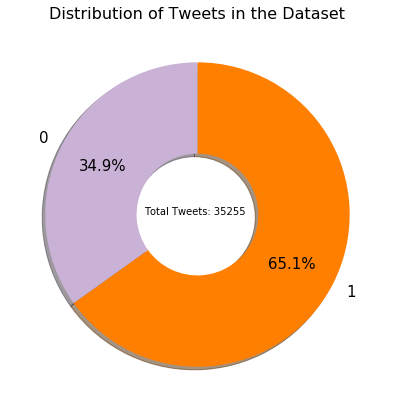

In [ ]:
plt.figure(figsize = (7,7))
counts = dataset['label'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

In [ ]:
df1_bully=[df1.iloc[i]['full_text'] for i in df1.index if df1.iloc[i]['label']=='Offensive']
len(df1_bully)

2336

In [ ]:
df1_non_bully=[df1.iloc[i]['full_text'] for i in df1.index if df1.iloc[i]['label']=='Non-offensive']
len(df1_non_bully)

8136

In [ ]:
df2_non_bully=[df2.iloc[i]['full_text'] for i in df2.index if df2.iloc[i]['label']=='Non-offensive']
len(df2_non_bully)

4163

In [ ]:
df2_bully=[df2.iloc[i]['full_text'] for i in df2.index if df2.iloc[i]['label']=='Offensive']
df2_bully=df2_bully[:4005]
len(df2_bully)

4005

In [ ]:
df_cyber=pd.read_csv('/content/drive/MyDrive/datasets/cyberbullying_tweets.csv')
df_cyber

tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]

In [ ]:
df_cyber.drop_duplicates(inplace=True)
df_cyber = df_cyber.dropna()
df_cyber = df_cyber.reset_index()
print(df_cyber)

       index                                         tweet_text  \
0          0  In other words #katandandre, your food was cra...   
1          1  Why is #aussietv so white? #MKR #theblock #ImA...   
2          2  @XochitlSuckkks a classy whore? Or more red ve...   
3          3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4          4  @RudhoeEnglish This is an ISIS account pretend...   
...      ...                                                ...   
47651  47687  Black ppl aren't expected to do anything, depe...   
47652  47688  Turner did not withhold his disappointment. Tu...   
47653  47689  I swear to God. This dumb nigger bitch. I have...   
47654  47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...   
47655  47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...   

      cyberbullying_type  
0      not_cyberbullying  
1      not_cyberbullying  
2      not_cyberbullying  
3      not_cyberbullying  
4      not_cyberbullying  
...                  ...  
47651 

In [ ]:
df_cyber['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
df_cyber_not_bully=[df_cyber.iloc[i]['tweet_text'] for i in df_cyber.index if df_cyber.iloc[i]['cyberbullying_type']=='not_cyberbullying']
len(df_cyber_not_bully)

7937

In [ ]:
df_cyber_gender=[df_cyber.iloc[i]['tweet_text'] for i in df_cyber.index if df_cyber.iloc[i]['cyberbullying_type']=='gender']
df_cyber_gender=df_cyber_gender[:4379]
len(df_cyber_gender)

4379

In [ ]:
df_cyber_religion=[df_cyber.iloc[i]['tweet_text'] for i in df_cyber.index if df_cyber.iloc[i]['cyberbullying_type']=='religion']
df_cyber_religion=df_cyber_religion[:6349]
len(df_cyber_religion)

6349

In [ ]:
df_cyber_age=[df_cyber.iloc[i]['tweet_text'] for i in df_cyber.index if df_cyber.iloc[i]['cyberbullying_type']=='age']
df_cyber_age=df_cyber_age[:6349]
len(df_cyber_age)

6349

In [ ]:
df_cyber_ethnicity=[df_cyber.iloc[i]['tweet_text'] for i in df_cyber.index if df_cyber.iloc[i]['cyberbullying_type']=='ethnicity']
df_cyber_ethnicity=df_cyber_ethnicity[:6349]
len(df_cyber_ethnicity)

6349

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/datasets/twitter_parsed_dataset.csv')
df4

index            id  \
0      5.750000e+17  5.750000e+17   
1      5.720000e+17  5.720000e+17   
2      3.900000e+17  3.900000e+17   
3      5.680000e+17  5.680000e+17   
4      5.760000e+17  5.760000e+17   
...             ...           ...   
16844  5.760000e+17  5.760000e+17   
16845  5.720000e+17  5.720000e+17   
16846  5.720000e+17  5.720000e+17   
16847  5.750000e+17  5.750000e+17   
16848  5.690000e+17  5.690000e+17   

                                                    Text Annotation  oh_label  
0      @halalflaws @biebervalue @greenlinerzjm I read...       none         0  
1      @ShreyaBafna3 Now you idiots claim that people...       none         0  
2      RT @Mooseoftorment Call me sexist, but when I ...     sexism         1  
3      @g0ssipsquirrelx Wrong, ISIS follows the examp...     racism         1  
4                                 #mkr No No No No No No       none         0  
...                                                  ...        ...       ...  
16844  Feeling so sorry for the girls, they should be...       none         0  
16845  #MKR 'pretty good dishes we're happy with' - O...       none         0  
16846  RT @colonelkickhead: Deconstructed lemon tart!...       none         0  
16847  @versacezaynx @nyazpolitics @greenlinerzjm You...       none         0  
16848  And before you protest that you're *not* mad, ...       none         0  

[16849 rows x 5 columns]

In [ ]:
df4.drop_duplicates(inplace=True)
df4 = df4.dropna()
df4 = df4.reset_index()
print(len(df4))

16849


In [ ]:
more_data = [ df4.iloc[i]["Text"] for i in df4.index if df4.iloc[i]["oh_label"]==0 ]
len(more_data)

11501

In [ ]:
racism_data=[df4.iloc[i]['Text'] for i in df4.index if df4.iloc[i]['Annotation']=='racism']
len(racism_data)

1970

In [ ]:
bully_data=df1_bully.copy()
bully_data.extend(df2_bully)
bully_data.extend(df_cyber_gender)
bully_data.extend(df_cyber_religion)
bully_data.extend(df_cyber_age)
bully_data.extend(df_cyber_ethnicity)
bully_data.extend(racism_data)
len(bully_data)

31737

In [ ]:
non_bully_data=df1_non_bully.copy()
non_bully_data.extend(df2_non_bully)
non_bully_data.extend(df_cyber_not_bully)
non_bully_data.extend(more_data)
len(non_bully_data)

31737

In [ ]:
data=bully_data.copy()
data.extend(non_bully_data)
len(data)

63474

In [ ]:
print(len(bully_data))
print(len(non_bully_data))

31737
31737


In [ ]:
y_data=[1]*len(bully_data)
y_data.extend([0]*len(non_bully_data))
len(y_data)

63474

In [ ]:
dataset=pd.DataFrame(list(zip(y_data,data)),columns=['label', 'full_text']).sample(frac=1, random_state=45).reset_index()
dataset=dataset.drop('index',axis=1)

In [ ]:
dataset

label                                          full_text
0          1  no joke today in history we learnt that 1 in 1...
1          0  RT @estherarmah: In 4 days: Tanesha Anderson -...
2          0  @mykitchenrules Lyn and Tony you're wonderful ...
3          0                             http://t.co/daznQZR8Te
4          0  @Trollpedia69 none of it is private info. I've...
...      ...                                                ...
63469      0                gozleme is taking way too long #mkr
63470      1  @PaulMoon8 @yurista4life @justinmiculka01 you ...
63471      0                    Relevant:http://t.co/2Z2EkuXlYT
63472      1  @SarahBMaslow_RC It kinda was tho:/, + if it w...
63473      0  My daughter thinks those blueberry pancakes lo...

[63474 rows x 2 columns]

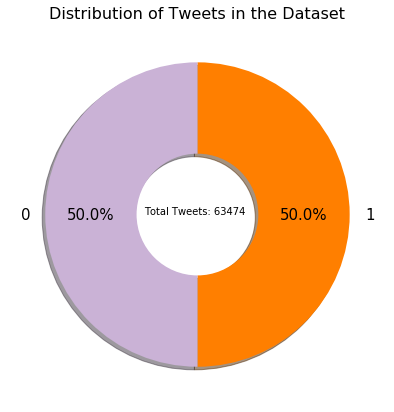

In [ ]:
plt.figure(figsize = (7,7))
counts = dataset['label'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(dataset.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

## Create DataFrame

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(dataset.drop('label',axis=1),dataset['label'],test_size=0.2,random_state=101)

In [ ]:
x_test = x_test['full_text'].to_list()
y_test = y_test.to_list()
x_train = x_train['full_text'].to_list()
y_train = y_train.to_list()

In [ ]:
print(x_test)
print(y_test)

['NOT ISIS. I repeat NOT ISIS. ISIS claims to be Islamic, but they’re just terrorists and use that as an excuse. The Quran condemns any sort of violence; even against an ant. So how could we harm innocent children and human beings ?', "Were butchers but can't tell red poultry is not cooked..  #salmonellaqueens #MKR", 'hot take for y’all on this fine afternoon: - gay is not an insult - let the f- slur die - rape jokes aren’t funny - the r-word is not okay to use as an insult - catcalling isn’t a compliment - non-black ppl using the n-word need to stop - no means no', '@ash_lugo: @HolyKaron @NIGGER_IM_JESUS @BallOver_All that bitch aint dumb he dumb asail u never post fuck a stripper just SLOPPY TOPPY', 'tb to those girls who bullied me in earth science for putting on makeup, one of them is now a horse girl and the other one dropped out of high school to work at a 3star restaurant :)', 'So bummed the dull chicks on #MKR are using such a great name for their restaurant. #Sassy #Iamlatetot

In [ ]:
df_combine = pd.DataFrame(list(zip(x_test, y_test)), columns=['text', 'label'])
df_combine

text  label
0      NOT ISIS. I repeat NOT ISIS. ISIS claims to be...      1
1      Were butchers but can't tell red poultry is no...      1
2      hot take for y’all on this fine afternoon: - g...      1
3      @ash_lugo: @HolyKaron @NIGGER_IM_JESUS @BallOv...      1
4      tb to those girls who bullied me in earth scie...      1
...                                                  ...    ...
12690  Oh there was. I was also the girl everyone fea...      1
12691  Y'ALL SEE THIS? Rt"@tayyoung_ FUCK OBAMA, dumb...      1
12692                   Wha you already did ur first one      1
12693  @wahab19493312 The prophet Mohammed didn't bot...      1
12694  @edgeofthesandbx @batchelorshow @FearDept So, ...      1

[12695 rows x 2 columns]

In [ ]:
train_data = pd.DataFrame(list(zip(x_train, y_train)), columns=['text', 'label'])
train_data

text  label
0      Apple accuses Motorola, Samsung of monopolizin...      0
1      Watch out for your child. My bullies almost ki...      1
2      “@mickystre: I wonder who slept on this in ten...      0
3      Pretty over this whole Yankees thing, id rathe...      0
4      if u think its about to start for u keep a pad...      1
...                                                  ...    ...
50774  Nothing like a little Colin to cheer up this m...      0
50775  &#8220;@BillieBoyMitch: @VSamone man I was bou...      1
50776  @suranie Exactly.  Merkel is defending this.  ...      1
50777  Unfortunately, a positive experience doesn't c...      0
50778  RT @parisba: A #GamerGate fan attending #GDC15...      0

[50779 rows x 2 columns]

In [ ]:
num_train_zero = sum(train_data["label"] == 0)
num_train_one = sum(train_data["label"] == 1)
print(num_train_zero)
print(num_train_one)

25401
25378


In [ ]:
num_train_zero = sum(df_combine["label"] == 0.0)
num_train_one = sum(df_combine["label"] == 1.0)
print(num_train_zero)
print(num_train_one)

6336
6359


# loading imbalnce dataset

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/datasets/labeled_tweets.csv')

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/datasets/public_data_labeled.csv')

In [ ]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [ ]:
df1 = df1.dropna()
df2 = df2.dropna()

In [ ]:
dataset=pd.concat([df1,df2],axis=0)
dataset=dataset.reset_index()
dataset

index  Unnamed: 0          label  \
0          0         0.0  Non-offensive   
1          1         1.0  Non-offensive   
2          2         2.0  Non-offensive   
3          3         3.0  Non-offensive   
4          4         4.0  Non-offensive   
...      ...         ...            ...   
35250  24778         NaN      Offensive   
35251  24779         NaN  Non-offensive   
35252  24780         NaN      Offensive   
35253  24781         NaN      Offensive   
35254  24782         NaN  Non-offensive   

                                               full_text  
0      I'm not really sure yet if I feel comfortable ...  
1      MUCH SELF AWARE, WOW @Prit1010: This made me c...  
2      The more companies I talk to, the more I reali...  
3      @scaryjen @Kirtaner @DigiRanger1994 we aren't ...  
4       Not enough Lemon in their lemon tart #MKR woops.  
...                                                  ...  
35250  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
35251  you've gone and broke the wrong heart baby, an...  
35252  young buck wanna eat!!.. dat nigguh like I ain...  
35253              youu got wild bitches tellin you lies  
35254  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...  

[35255 rows x 4 columns]

In [ ]:
def dropdataset(df):
   df = df.drop('index',axis=1)
   df = df.drop('Unnamed: 0',axis=1)
   return df

In [ ]:
dataset=dropdataset(dataset)
dataset

label                                          full_text
0      Non-offensive  I'm not really sure yet if I feel comfortable ...
1      Non-offensive  MUCH SELF AWARE, WOW @Prit1010: This made me c...
2      Non-offensive  The more companies I talk to, the more I reali...
3      Non-offensive  @scaryjen @Kirtaner @DigiRanger1994 we aren't ...
4      Non-offensive   Not enough Lemon in their lemon tart #MKR woops.
...              ...                                                ...
35250      Offensive  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
35251  Non-offensive  you've gone and broke the wrong heart baby, an...
35252      Offensive  young buck wanna eat!!.. dat nigguh like I ain...
35253      Offensive              youu got wild bitches tellin you lies
35254  Non-offensive  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[35255 rows x 2 columns]

In [ ]:
dataset['label'] = dataset['label'].apply(lambda row: 0 if row == "Non-offensive" else 1)
dataset

label                                          full_text
0          0  I'm not really sure yet if I feel comfortable ...
1          0  MUCH SELF AWARE, WOW @Prit1010: This made me c...
2          0  The more companies I talk to, the more I reali...
3          0  @scaryjen @Kirtaner @DigiRanger1994 we aren't ...
4          0   Not enough Lemon in their lemon tart #MKR woops.
...      ...                                                ...
35250      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
35251      0  you've gone and broke the wrong heart baby, an...
35252      1  young buck wanna eat!!.. dat nigguh like I ain...
35253      1              youu got wild bitches tellin you lies
35254      0  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[35255 rows x 2 columns]

In [ ]:
df_cyber=pd.read_csv('/content/drive/MyDrive/datasets/cyberbullying_tweets.csv')

In [ ]:
df_cyber.drop_duplicates(inplace=True)
df_cyber = df_cyber.dropna()
df_cyber = df_cyber.reset_index()
print(df_cyber)

       index                                         tweet_text  \
0          0  In other words #katandandre, your food was cra...   
1          1  Why is #aussietv so white? #MKR #theblock #ImA...   
2          2  @XochitlSuckkks a classy whore? Or more red ve...   
3          3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4          4  @RudhoeEnglish This is an ISIS account pretend...   
...      ...                                                ...   
47651  47687  Black ppl aren't expected to do anything, depe...   
47652  47688  Turner did not withhold his disappointment. Tu...   
47653  47689  I swear to God. This dumb nigger bitch. I have...   
47654  47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...   
47655  47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...   

      cyberbullying_type  
0      not_cyberbullying  
1      not_cyberbullying  
2      not_cyberbullying  
3      not_cyberbullying  
4      not_cyberbullying  
...                  ...  
47651 

In [ ]:
df_cyber_not_bully=[df_cyber.iloc[i]['tweet_text'] for i in df_cyber.index if df_cyber.iloc[i]['cyberbullying_type']=='not_cyberbullying']
len(df_cyber_not_bully)

7937

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/datasets/twitter_parsed_dataset.csv')

In [ ]:
df4.drop_duplicates(inplace=True)
df4 = df4.dropna()
df4 = df4.reset_index()
print(len(df4))

16849


In [ ]:
more_data = [ df4.iloc[i]["Text"] for i in df4.index if df4.iloc[i]["oh_label"]==0 ]
len(more_data)

11501

In [ ]:
more_data_notbully = [ dataset.iloc[i]["full_text"] for i in dataset.index if dataset.iloc[i]["label"]==0 ]
more_data_bully = [ dataset.iloc[i]["full_text"] for i in dataset.index if dataset.iloc[i]["label"]==1 ]
more_data_bully=more_data_bully[:2001]

In [ ]:
y_not_bully=[0]*(len(more_data)+len(df_cyber_not_bully))
y_not_bully.extend(([0]*(len(more_data_notbully))))
y_not_bully.extend(([1]*(len(more_data_bully))))

In [ ]:
data=[]
data.extend(df_cyber_not_bully)
data.extend(more_data)
data.extend(more_data_notbully)
data.extend(more_data_bully)

In [ ]:
dataset=pd.DataFrame(list(zip(y_not_bully,data)),columns=['label', 'full_text']).sample(frac=1, random_state=45).reset_index()
dataset=dataset.drop('index',axis=1)


In [ ]:
dataset

label                                          full_text
0          0  ugh. no. I am finally dealing with imposter sy...
1          0  @MetroidThief it was difficult for me as well ...
2          0  Protip: When you jump into the mob to harass s...
3          0  I think I found a normal roommate again! Prais...
4          0  Who wants to take bets on if he starts talking...
...      ...                                                ...
33733      1  @SultraSoV Yes and no.  1A issue but banned as...
33734      0  RT @srhbutts: women at GDC share heartbreaking...
33735      0  RT @truciee: What a horrible human you are to ...
33736      0  The Full Body Project by Leonard Nimoy [NSFW] ...
33737      0  RT @Liveuamap: And like Russian Militants "IS ...

[33738 rows x 2 columns]

In [ ]:
num_train_zero = sum(dataset["label"] == 0.0)
num_train_one = sum(dataset["label"] == 1.0)
print(num_train_zero)
print(num_train_one)

31737
2001


## Create DataFrame

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(dataset.drop('label',axis=1),dataset['label'],test_size=0.2,random_state=101)

In [ ]:
x_test = x_test['full_text'].to_list()
y_test = y_test.to_list()
x_train = x_train['full_text'].to_list()
y_train = y_train.to_list()

In [ ]:
print(x_test)
print(y_test)

['@AK_Doug THANK YOU! :D', 'RT @kurdishblogger: Stoning women to death have become common in Mosul by the Islamic State. \nphotos published today http://t.co/f5f8ZX4Z6q', "I cannot stop looking at Nikki's dreadful black crooked bra #MKR #MKR2015", 'I just want to hear the screams of "collusion"', '@HumanistFury @FeministFailure It\'s still going strong...but I will eventually devolve into pics of hot women "Pam or Carmen"? Etc.', "RT @amsafavi: MUST WATCH Moving clip on 6 Kurdish Pol. Prisoners executed under Rouhani's tenure in #iran http://t.co/xb0ri2tzPi @BarackOba…", '@arrivalgame you too!', 'RT @GoJonnyBananas I hate tweeting this but, the blonde girl on the British curling team has extraordinary eyes #notsexist #justsaying', 'RT @charlwhat HOLY FUCK IM NOT SEXIST BUT ALOT OF WOMEN CANNOT FUCKING DRIVE', "I can't even find it in me to mock anymore. This is scary. This mass ignorance is terrifying. RT @KateElliottSFF Yes, alas, I agree.", 'Her laugh is horrendous #MKR', '@ACMobbDee

In [ ]:
df_combine = pd.DataFrame(list(zip(x_test, y_test)), columns=['text', 'label'])
df_combine

text  label
0                                @AK_Doug THANK YOU! :D      0
1     RT @kurdishblogger: Stoning women to death hav...      0
2     I cannot stop looking at Nikki's dreadful blac...      1
3        I just want to hear the screams of "collusion"      0
4     @HumanistFury @FeministFailure It's still goin...      1
...                                                 ...    ...
6743  @flyfishidaho I'm not a shark, I'm the tree be...      0
6744  I hear that it's snowing up north. Glad I made...      0
6745  stan got this A+ last word before blocking me:...      0
6746  RT @Dean_Machine_: Of course Annie doesn't do ...      0
6747  OMG!A friggin 1!What the?Wow! The 2 of U R dis...      0

[6748 rows x 2 columns]

In [ ]:
train_data = pd.DataFrame(list(zip(x_train, y_train)), columns=['text', 'label'])
train_data

text  label
0                       Just kidding. I'm more like beta      0
1      Want to touch tha boootyyyyy....neeeeed to tou...      0
2                                @holinka ARE YOU AT GDC      0
3      RT @AussieJulie: @mykitchenrules How about nex...      0
4                                        I'M SO MAD #MKR      0
...                                                  ...    ...
26985  @EnGlobalNewsW @NuceApp Two problems with that...      0
26986  RT @HeidiL_RN: #hillaryemail #hillaryclinton h...      0
26987  @seanbonner ideas and observations that are co...      0
26988  @Spacekatgal just be careful that you protect ...      0
26989  These white racists are unqualified and were o...      0

[26990 rows x 2 columns]

In [ ]:
num_train_zero = sum(train_data["label"] == 0)
num_train_one = sum(train_data["label"] == 1)
print(num_train_zero)
print(num_train_one)

25392
1598


In [ ]:
num_train_zero = sum(df_combine["label"] == 0.0)
num_train_one = sum(df_combine["label"] == 1.0)
print(num_train_zero)
print(num_train_one)

6345
403


# Pre processing

In [ ]:
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [ ]:
def cleantext(text):
   text = decontract(text)
   text = text.replace('\r', '').replace('\n', ' ')
   text = re.sub(r"(?:\@|https?\://)\S+", "", text)
   text = [t for t in text.split() if (('RT' != t) and ('@' not in t) and ('$' not in t) and ('&' not in t)  and ('mkr' not in t) and ("MKR" not in t))]
   text = " ".join(text)
   text = [t if ('u' != t) else " you " for t in text.split()]
   text = " ".join(text)
   text = re.sub('[^a-zA-Z]', ' ', text)
   text = re.sub("\s\s+" , " ", text)
   return text.strip()

In [ ]:
print(cleantext("""hello i'm romina 😄,
i love $money u """))

hello i am romina i love you


In [ ]:
t=cleantext("@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history of Islamic slavery. https://t.co/xWJzpSodGj")
t

'I read them in context No change in meaning The history of Islamic slavery'

In [ ]:
train_data['text']=train_data['text'].apply(lambda row :  cleantext(row))

In [ ]:
text_len = []
for text in train_data["text"]:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
train_data['text_len'] = text_len
train_data

text  label  text_len
0      Apple accuses Motorola Samsung of monopolizing...      0        14
1      Watch out for your child My bullies almost kil...      1        53
2      I wonder who slept on this in tent Celine I am...      0        19
3      Pretty over this whole Yankees thing id rather...      0        24
4      if you think its about to start for you keep a...      1        59
...                                                  ...    ...       ...
50774  Nothing like a little Colin to cheer up this m...      0        15
50775  man I was bouta text all the bitches that ever...      1        15
50776  Exactly Merkel is defending this And the prote...      1        15
50777  Unfortunately a positive experience does not c...      0        23
50778  A GamerGate fan attending GDC lists all they d...      0        22

[50779 rows x 3 columns]

In [ ]:
train_data = train_data[train_data["text_len"] > 0]
train_data = train_data.reset_index()
train_data = train_data.drop('index', axis=1)

In [ ]:
train_data

text  label  text_len
0      Apple accuses Motorola Samsung of monopolizing...      0        14
1      Watch out for your child My bullies almost kil...      1        53
2      I wonder who slept on this in tent Celine I am...      0        19
3      Pretty over this whole Yankees thing id rather...      0        24
4      if you think its about to start for you keep a...      1        59
...                                                  ...    ...       ...
50364  Nothing like a little Colin to cheer up this m...      0        15
50365  man I was bouta text all the bitches that ever...      1        15
50366  Exactly Merkel is defending this And the prote...      1        15
50367  Unfortunately a positive experience does not c...      0        23
50368  A GamerGate fan attending GDC lists all they d...      0        22

[50369 rows x 3 columns]

In [ ]:
df_combine['text'] = df_combine['text'].apply(lambda row : cleantext(row))

In [ ]:
text_len2 = []
for text in df_combine["text"]:
    tweet_len = len(text.split())
    text_len2.append(tweet_len)
df_combine['text_len'] = text_len2
df_combine

text  label  text_len
0      NOT ISIS I repeat NOT ISIS ISIS claims to be I...      1        43
1      Were butchers but can not tell red poultry is ...      1        12
2      hot take for y all on this fine afternoon gay ...      1        53
3      that bitch aint dumb he dumb asail you never p...      1        16
4      tb to those girls who bullied me in earth scie...      1        37
...                                                  ...    ...       ...
12690  Oh there was I was also the girl everyone fear...      1        56
12691  Y ALL SEE THIS Rt FUCK OBAMA dumb ass nigger w...      1        23
12692                   Wha you already did ur first one      1         7
12693  The prophet Mohammed did not bother to help th...      1        22
12694  So if I say that you must be a murdering fasci...      1        19

[12695 rows x 3 columns]

In [ ]:
df_combine = df_combine[df_combine["text_len"] > 0]
df_combine = df_combine.reset_index()
df_combine = df_combine.drop('index', axis=1)

In [ ]:
df_combine

text  label  text_len
0      NOT ISIS I repeat NOT ISIS ISIS claims to be I...      1        43
1      Were butchers but can not tell red poultry is ...      1        12
2      hot take for y all on this fine afternoon gay ...      1        53
3      that bitch aint dumb he dumb asail you never p...      1        16
4      tb to those girls who bullied me in earth scie...      1        37
...                                                  ...    ...       ...
12589  Oh there was I was also the girl everyone fear...      1        56
12590  Y ALL SEE THIS Rt FUCK OBAMA dumb ass nigger w...      1        23
12591                   Wha you already did ur first one      1         7
12592  The prophet Mohammed did not bother to help th...      1        22
12593  So if I say that you must be a murdering fasci...      1        19

[12594 rows x 3 columns]

In [ ]:
df_combine=df_combine.dropna().reset_index()
train_data=train_data.dropna().reset_index()

# lower case


In [ ]:
def lowercaseWords(text):
   text = text.lower()
   return text

In [ ]:
train_data['text'] = train_data['text'].apply(lambda row: lowercaseWords(row))
train_data = train_data.drop('index', axis=1)
train_data

text  label  text_len
0                       just kidding i am more like beta      0         7
1      want to touch tha boootyyyyy neeeeed to touch ...      0        10
2                                         are you at gdc      0         4
3      how about next season you hold off on the scor...      0        21
4                                             i m so mad      0         4
...                                                  ...    ...       ...
26593      two problems with that obama iraqi government      0         7
26594                        hillaryemail hillaryclinton      0         2
26595  ideas and observations that are completely dis...      0        14
26596  just be careful that you protect yourself you ...      0        11
26597  these white racists are unqualified and were o...      0        19

[26598 rows x 3 columns]

In [ ]:
df_combine['text']=df_combine['text'].apply(lambda row: lowercaseWords(row))
df_combine = df_combine.drop('index', axis=1)
df_combine

text  label  text_len
0                                           thank you d      0         3
1     stoning women to death have become common in m...      0        16
2     i cannot stop looking at nikki is dreadful bla...      1        11
3          i just want to hear the screams of collusion      0         9
4     it is still going strong but i will eventually...      1        19
...                                                 ...    ...       ...
6640    i am not a shark i am the tree behind the shark      0        12
6641  i hear that it is snowing up north glad i made...      0        18
6642  stan got this a last word before blocking me e...      0        20
6643  of course annie does not do outside she is a r...      0        11
6644  omg a friggin what the wow the of u r disgrace...      0        21

[6645 rows x 3 columns]

# stop words

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")
def deletestopwords(text):
   text = " ".join([t for t in text.split() if t not in stopwords])
   return text

In [ ]:
train_data['text'] = train_data['text'].apply(lambda row: deletestopwords(row))
train_data=train_data.dropna()
train_data

index                                               text  label  \
0          0  Apple accuses Motorola Samsung monopolizing ma...      0   
1          1  Watch child My bullies almost killed parents n...      1   
2          2  I wonder slept tent Celine I talking Burp wit ...      0   
3          3  Pretty whole Yankees thing id rather lose ALCS...      0   
4          4  think start keep pad tampon whichever one pref...      1   
...      ...                                                ...    ...   
50364  50364  Nothing like little Colin cheer mums night loo...      0   
50365  50365                 man I bouta text bitches ever told      1   
50366  50366  Exactly Merkel defending And protesters called...      1   
50367  50367  Unfortunately positive experience cancel negat...      0   
50368  50368  A GamerGate fan attending GDC lists like indus...      0   

       text_len  
0            14  
1            53  
2            19  
3            24  
4            59  
...         ...  
50364        15  
50365        15  
50366        15  
50367        23  
50368        22  

[50369 rows x 4 columns]

In [ ]:
df_combine['text']=df_combine['text'].apply(lambda row: deletestopwords(row))
df_combine=df_combine.dropna()
df_combine

index                                               text  label  \
0          0  NOT ISIS I repeat NOT ISIS ISIS claims Islamic...      1   
1          1  Were butchers tell red poultry cooked salmonel...      1   
2          2  hot take fine afternoon gay insult let f slur ...      1   
3          3  bitch aint dumb dumb asail never post fuck str...      1   
4          4  tb girls bullied earth science putting makeup ...      1   
...      ...                                                ...    ...   
12589  12589  Oh I also girl everyone feared school Because ...      1   
12590  12590  Y ALL SEE THIS Rt FUCK OBAMA dumb ass nigger w...      1   
12591  12591                           Wha already ur first one      1   
12592  12592  The prophet Mohammed bother help poor convert ...      1   
12593  12593  So I say must murdering fascist follow book I ...      1   

       text_len  
0            43  
1            12  
2            53  
3            16  
4            37  
...         ...  
12589        56  
12590        23  
12591         7  
12592        22  
12593        19  

[12594 rows x 4 columns]

In [ ]:
train_data['text'] .str.len().min()

0

In [ ]:
print(len(train_data.index))

50369


In [ ]:
def filter_empty_data(df):
     text = []
     label = []
     for i in range(len(df.index)):
        if len(df["text"][i]) != 0:
           text.append(df["text"][i])
           label.append(df["label"][i])
     data = {"text" : text, "label": label}
     df = pd.DataFrame(data)
     return df

In [ ]:
train_data = filter_empty_data(train_data)
df_combine = filter_empty_data(df_combine)

In [ ]:
text_len = []
for text in train_data["text"]:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
train_data['text_len'] = text_len
train_data

text  label  text_len
0      Apple accuses Motorola Samsung monopolizing ma...      0        11
1      Watch child My bullies almost killed parents n...      1        26
2      I wonder slept tent Celine I talking Burp wit ...      0        10
3      Pretty whole Yankees thing id rather lose ALCS...      0        17
4      think start keep pad tampon whichever one pref...      1        25
...                                                  ...    ...       ...
50310  Nothing like little Colin cheer mums night loo...      0         9
50311                 man I bouta text bitches ever told      1         7
50312  Exactly Merkel defending And protesters called...      1         7
50313  Unfortunately positive experience cancel negat...      0        13
50314  A GamerGate fan attending GDC lists like indus...      0        12

[50315 rows x 3 columns]

In [ ]:
train_data = train_data[train_data["text_len"] > 0]
train_data = train_data.reset_index()
train_data = train_data.drop('index', axis=1)

In [ ]:
text_len2 = []
for text in df_combine["text"]:
    tweet_len = len(text.split())
    text_len2.append(tweet_len)
df_combine['text_len'] = text_len2
df_combine

text  label  text_len
0      NOT ISIS I repeat NOT ISIS ISIS claims Islamic...      1        26
1      Were butchers tell red poultry cooked salmonel...      1         7
2      hot take fine afternoon gay insult let f slur ...      1        29
3      bitch aint dumb dumb asail never post fuck str...      1        11
4      tb girls bullied earth science putting makeup ...      1        17
...                                                  ...    ...       ...
12575  Oh I also girl everyone feared school Because ...      1        28
12576  Y ALL SEE THIS Rt FUCK OBAMA dumb ass nigger w...      1        18
12577                           Wha already ur first one      1         5
12578  The prophet Mohammed bother help poor convert ...      1        11
12579  So I say must murdering fascist follow book I ...      1        10

[12580 rows x 3 columns]

In [ ]:
df_combine = df_combine[df_combine["text_len"] > 0]
df_combine = df_combine.reset_index()
df_combine = df_combine.drop('index', axis=1)

In [ ]:
train_data['text'] .str.len().min()

1

In [ ]:
print(len(train_data.index))

50315


# lemmatizing

In [ ]:
lemmatizer=WordNetLemmatizer()
def lemmatizeWords(text):
  text=" ".join([lemmatizer.lemmatize(t) for t in text.split()])
  return text

In [ ]:
df_combine['text']=df_combine['text'].apply(lambda row : lemmatizeWords(row))
df_combine

text  label  text_len
0      NOT ISIS I repeat NOT ISIS ISIS claim Islamic ...      1        26
1      Were butcher tell red poultry cooked salmonell...      1         7
2      hot take fine afternoon gay insult let f slur ...      1        29
3      bitch aint dumb dumb asail never post fuck str...      1        11
4      tb girl bullied earth science putting makeup o...      1        17
...                                                  ...    ...       ...
12575  Oh I also girl everyone feared school Because ...      1        28
12576  Y ALL SEE THIS Rt FUCK OBAMA dumb as nigger wo...      1        18
12577                           Wha already ur first one      1         5
12578  The prophet Mohammed bother help poor convert ...      1        11
12579  So I say must murdering fascist follow book I ...      1        10

[12580 rows x 3 columns]

In [ ]:
train_data['text']=train_data['text'].apply(lambda row : lemmatizeWords(row))
train_data

text  label  text_len
0      Apple accuses Motorola Samsung monopolizing ma...      0        11
1      Watch child My bully almost killed parent noth...      1        26
2      I wonder slept tent Celine I talking Burp wit ...      0        10
3      Pretty whole Yankees thing id rather lose ALCS...      0        17
4      think start keep pad tampon whichever one pref...      1        25
...                                                  ...    ...       ...
50310  Nothing like little Colin cheer mum night looo...      0         9
50311                   man I bouta text bitch ever told      1         7
50312  Exactly Merkel defending And protester called ...      1         7
50313  Unfortunately positive experience cancel negat...      0        13
50314  A GamerGate fan attending GDC list like indust...      0        12

[50315 rows x 3 columns]

# stemming

## porter stemming

In [ ]:
porter = PorterStemmer()
def porterstemming(text):
  text = porter.stem(text)
  return text

In [ ]:
df_combine['text']=df_combine['text'].apply(lambda row: porterstemming(row))
df_combine

text  label  text_len
0                                           thank you d      0         3
1     stoning women death become common mosul islami...      0        11
2     i cannot stop looking nikki dreadful black cro...      1         9
3                            i want hear screams collus      0         5
4     it still going strong i eventually devolve pic...      1        13
...                                                 ...    ...       ...
6620                        i shark i tree behind shark      0         6
6621        i hear snowing north glad i made snow start      0         9
6622  stan got a last word blocking ever heard caust...      0        15
6623                of course annie outside she redhead      0         6
6624  omg a friggin what wow the u r disgraceful abs...      0        15

[6625 rows x 3 columns]

In [ ]:
train_data['text']=train_data['text'].apply(lambda row: porterstemming(row))
train_data

text  label  text_len
0                               just kidding i like beta      0         5
1          want touch tha boootyyyyy neeeeed touch heini      0         7
2                                         are you at gdc      0         4
3      how next season hold scores teams cooked strat...      0        10
4                                             i m so mad      0         4
...                                                  ...    ...       ...
26548                    two problems obama iraqi govern      0         5
26549                        hillaryemail hillaryclinton      0         2
26550  ideas observations completely dismissive low i...      0         7
26551                         careful protect you know i      0         5
26552  these white racists unqualified hired affirmat...      0        11

[26553 rows x 3 columns]

## snowball stemming

In [ ]:
snowball = SnowballStemmer("english")
def snowballstemming(text):
  text = snowball.stem(text)
  return text

In [ ]:
train_data['text'] = train_data['text'].apply(lambda row : snowballstemming(row))
train_data

text  label  text_len
0                       just kidding i am more like beta      0         7
1      want to touch tha boootyyyyy neeeeed to touch ...      0        10
2                                         are you at gdc      0         4
3      how about next season you hold off on the scor...      0        21
4                                             i m so mad      0         4
...                                                  ...    ...       ...
26593          two problems with that obama iraqi govern      0         7
26594                        hillaryemail hillaryclinton      0         2
26595  ideas and observations that are completely dis...      0        14
26596  just be careful that you protect yourself you ...      0        11
26597  these white racists are unqualified and were o...      0        19

[26598 rows x 3 columns]

In [ ]:
df_combine['text'] = df_combine['text'].apply(lambda row : snowballstemming(row))
df_combine

text  label  text_len
0                                           thank you d      0         3
1     stoning women to death have become common in m...      0        16
2     i cannot stop looking at nikki is dreadful bla...      1        11
3             i just want to hear the screams of collus      0         9
4     it is still going strong but i will eventually...      1        19
...                                                 ...    ...       ...
6640    i am not a shark i am the tree behind the shark      0        12
6641  i hear that it is snowing up north glad i made...      0        18
6642  stan got this a last word before blocking me e...      0        20
6643  of course annie does not do outside she is a r...      0        11
6644  omg a friggin what the wow the of u r disgrace...      0        21

[6645 rows x 3 columns]

## Lancaster stemming

In [ ]:
lancaster=LancasterStemmer()
def lancasterstemming(text):
  text = " ".join([lancaster.stem(t) for t in text.split()])
  return text

In [ ]:
train_data['text'] = train_data['text'].apply(lambda row : lancasterstemming(row))
train_data

text  label  text_len
0                                            kid lik bet      0         3
1           want touch tha boootyyyyy neeeee touch heiny      0         7
2                                                    gdc      0         1
3      next season hold scor team cook strategy play par      0         9
4                                                    mad      0         1
...                                                  ...    ...       ...
26453                       two problem obam iraq govern      0         5
26454                        hillaryemail hillaryclinton      0         2
26455       idea observ complet dismit low incom bracket      0         7
26456                                   car protect know      0         3
26457  whit rac unqual hir affirm act whit otherw kno...      0        10

[26458 rows x 3 columns]

In [ ]:
df_combine['text'] = df_combine['text'].apply(lambda row : lancasterstemming(row))
df_combine

text  label  text_len
0                                                 thank      0         1
1     ston wom dea becom common mos islam stat photo...      0        11
2           cannot stop look nikk dread black crook bra      1         8
3                              want hear screams collud      0         4
4     stil going strong ev devolv pic hot wom pam ca...      1        11
...                                                 ...    ...       ...
6596                             shark tre behind shark      0         4
6597                  hear snow nor glad mad snow start      0         7
6598  stan got last word block ev heard caust sarcas...      0        14
6599                          cours anny outsid redhead      0         4
6600  omg friggin wow u r disgrac absolv shred good ...      0        12

[6601 rows x 3 columns]

# Train data Statistics

In [ ]:
train_data.sort_values(by=['text_len'], ascending=False)

text  label  text_len
17692  black white trying live like nigger pahahahaha...      1       179
11578  fuck obama dumb as nigger bitch whore smh thin...      1       159
3046   researcher push import top anti bullying progr...      0       137
38353  make rape joke make gay joke oh fat joke okay ...      1       117
9729   embellished afternoon moustachioed feint flick...      0        96
...                                                  ...    ...       ...
11218                                               tail      0         1
22421                                              proof      0         1
6785                                               jelly      0         1
28461                                              bitch      1         1
7954                                                 yes      1         1

[50217 rows x 3 columns]

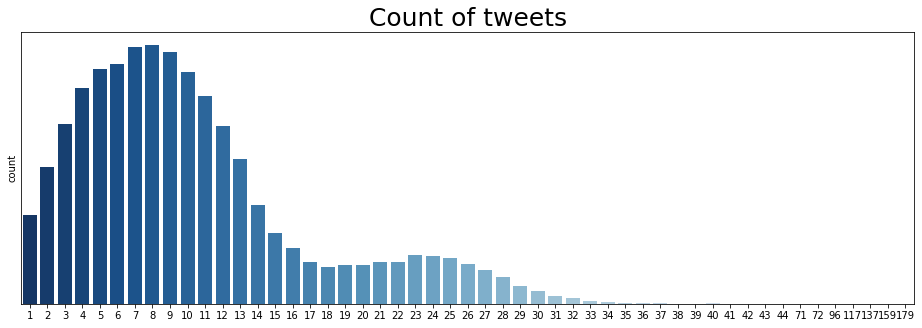

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=train_data[(train_data['text_len']<=1000) & (train_data['text_len']>0)], palette='Blues_r')
plt.title('Count of tweets', fontsize=25)
plt.yticks([])
abs_values = train_data['text_len'].value_counts(ascending=False).values
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
max_length = [len(x.split()) for x in train_data['text']]
print(min(max_length))
print(max(max_length))

1
179


In [ ]:
df_combine.sort_values(by=['text_len'], ascending=False)

text  label  text_len
7046   feel guilty killing feel guilty enjoyed tormen...      1       137
5954   dumb fine gon call ha ugly put head nd like mi...      1        40
245    butt nigger dumb fuck as stain bowel queef hon...      1        39
8430   kink n stuff limitless kink limit vore gore to...      1        38
8072   waise trump ne u economy achi nahi sambhali xc...      1        38
...                                                  ...    ...       ...
7122                          draaaaaaaaaaaaaaaaaaaaging      0         1
8659                                                 pve      0         1
2955                                                  aw      0         1
12247                                           anything      0         1
11535                                             banter      0         1

[12554 rows x 3 columns]

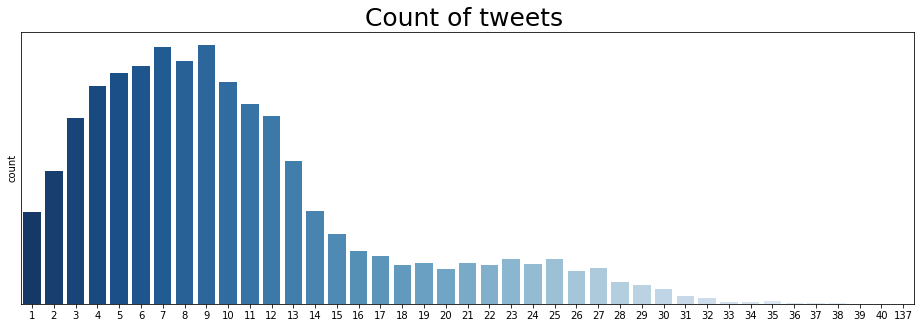

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df_combine[(df_combine['text_len']<=1000) & (df_combine['text_len']>0)], palette='Blues_r')
plt.title('Count of tweets ', fontsize=25)
plt.yticks([])
abs_values = df_combine['text_len'].value_counts(ascending=False).values
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
max_length = [len(x.split()) for x in df_combine['text']]
print(min(max_length))
print(max(max_length))

1
137


In [ ]:
(unique, counts) = np.unique(train_data['label'], return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 24858],
       [    1, 25359]])

In [ ]:
(unique, counts) = np.unique(df_combine['label'], return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6201],
       [   1, 6353]])

# Over Sampling of Training data

In [ ]:
ros=RandomOverSampler()
x_train_ros,y_train_ros=ros.fit_resample(np.array(train_data['text']).reshape(-1,1),np.array(train_data['label']).reshape(-1,1))
train_data=pd.DataFrame({'text':x_train_ros.reshape(1,-1)[0],"label":y_train_ros})
train_data

text  label
0      Apple accuses Motorola Samsung monopolizing ma...      0
1      Watch child My bully almost killed parent noth...      1
2      I wonder slept tent Celine I talking Burp wit ...      0
3      Pretty whole Yankees thing id rather lose ALCS...      0
4      think start keep pad tampon whichever one pref...      1
...                                                  ...    ...
50719         hey voice man top seriously taking piss eh      0
50720  Gardy go yardy He lead game HR second straight...      0
50721                Yay Robert Lynzey Sheri Emilie back      0
50722  When phone go class teacher say turn trash son...      0
50723                  Video On The Record Charlie Baker      0

[50724 rows x 2 columns]

In [ ]:
(unique, counts) = np.unique(train_data['label'], return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 25362],
       [    1, 25362]])

# split datasets to train and test and validation

In [ ]:
X=df_combine['text']
Y=df_combine['label']

In [ ]:
x_test_df, x_val_df, y_test_df, y_val_df = train_test_split(X,Y,test_size=0.5,random_state=45)

In [ ]:
x_test = x_test_df.to_list()
x_val = x_val_df.to_list()
y_test = y_test_df.to_list()
y_val = y_val_df.to_list()

In [ ]:
y_train = train_data["label"].to_list()

# Tokenizer

In [ ]:
tokenizer=Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(train_data['text'])
print(tokenizer.word_index)

{'<oov>': 1, 'i': 2, 'school': 3, 'like': 4, 'fuck': 5, 'girl': 6, 'people': 7, 'nigger': 8, 'dumb': 9, 'high': 10, 'one': 11, 'bully': 12, 'you': 13, 'the': 14, 'bullied': 15, 'get': 16, 'bitch': 17, 'woman': 18, 'would': 19, 'joke': 20, 'muslim': 21, 'as': 22, 'know': 23, 'gay': 24, 'rape': 25, 'it': 26, 'idiot': 27, 'think': 28, 'black': 29, 'go': 30, 'make': 31, 'right': 32, 'say': 33, 'time': 34, 'white': 35, 'and': 36, 'islam': 37, 'kat': 38, 'want': 39, 'muslims': 40, 'u': 41, 'got': 42, 'see': 43, 'this': 44, 'really': 45, 'even': 46, 'sexist': 47, 'shit': 48, 'good': 49, 'thing': 50, 'call': 51, 'still': 52, 'look': 53, 'never': 54, 'need': 55, 'year': 56, 'a': 57, 'if': 58, 'so': 59, 'love': 60, 'that': 61, 'they': 62, 'lol': 63, 'back': 64, 'but': 65, 'hate': 66, 'christian': 67, 'going': 68, 'fucking': 69, 'man': 70, 'no': 71, 'terrorist': 72, 'called': 73, 'ur': 74, 'first': 75, 'way': 76, 'day': 77, 'what': 78, 'said': 79, 'mean': 80, 'islamic': 81, 'guy': 82, 'life': 83,

In [ ]:
len_word_index=len(tokenizer.word_index)+1
x_train_encode=tokenizer.texts_to_sequences(train_data['text'])
print(x_train_encode)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
x_test_encode=tokenizer.texts_to_sequences(x_test)
x_validation_encode=tokenizer.texts_to_sequences(x_val)
print(x_test_encode)
print(x_validation_encode)

[[2318, 4903, 79, 3472, 5505, 3472, 242, 35, 36, 52, 1771, 339, 169, 267, 46, 564, 806, 4870, 93, 6651, 3249, 35, 3253, 284, 73, 1293], [2, 11506, 2043, 127, 28470, 2, 1145, 1547, 58, 181, 1196, 5814, 4813, 291, 127], [545, 1544, 2146, 1203, 3313, 72, 971, 1966, 81, 199, 112, 178, 4961, 624, 3028], [112, 28, 9192, 2712, 23, 277, 413, 2690, 2008, 413, 105, 1089, 37], [286, 233], [2, 46, 127, 689, 1111, 2, 452, 1064, 133, 691, 2, 176, 417, 2, 376, 1074, 2, 93, 33, 98, 84, 208], [1116, 192, 1361, 948, 32551, 7185, 4286, 32115, 367, 133, 56, 407, 6500, 1815, 1, 29, 696, 7, 909, 2, 1931, 84, 1], [100, 1807, 226, 1354, 9192, 68, 157, 115, 421, 2423, 158], [14, 220, 948, 142, 2666, 65, 12511, 2, 1232, 33, 136, 1802, 1550], [105, 47, 2, 66, 101, 505, 2509], [403, 44, 444, 571, 1926, 1505, 178, 174, 51, 256, 57, 9, 8, 16, 14, 5, 1148, 369, 381, 41, 160, 17, 149, 314], [8358, 2501, 49, 557, 347, 8607, 3537, 271, 48, 26, 431, 48], [140, 37, 679, 1555, 40, 181, 285, 782, 214, 373], [2, 469, 341, 3

In [ ]:
print(type(tokenizer.word_counts))
print(tokenizer.word_counts)
ordered_num_words = OrderedDict(sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True))
print(ordered_num_words)

<class 'collections.OrderedDict'>
OrderedDict([('apple', 54), ('accuses', 2), ('motorola', 2), ('samsung', 2), ('monopolizing', 1), ('market', 20), ('patent', 5), ('bullying', 843), ('enough', 338), ('add', 90), ('hypocrisy', 57), ('watch', 331), ('child', 523), ('my', 858), ('bully', 3062), ('almost', 167), ('killed', 360), ('parent', 189), ('nothing', 584), ('today', 532), ('mom', 267), ('believe', 511), ('i', 19201), ('would', 2570), ('already', 313), ('taken', 94), ('scholarship', 10), ('private', 70), ('school', 6041), ('really', 1388), ('want', 1577), ('go', 1864), ('away', 330), ('it', 2096), ('wonder', 162), ('slept', 18), ('tent', 28), ('celine', 90), ('talking', 467), ('burp', 1), ('wit', 95), ('twitter', 745), ('pretty', 543), ('whole', 340), ('yankees', 181), ('thing', 1308), ('id', 70), ('rather', 189), ('lose', 88), ('alcs', 1), ('every', 811), ('year', 1207), ('live', 304), ('detroit', 10), ('miss', 136), ('real', 551), ('steinbrenner', 2), ('glorydays', 1), ('think', 19

In [ ]:
keys = []
values = []
counter = 0
for key, value in ordered_num_words.items():
    if counter == 20:
      break
    counter += 1
    keys.append(key)
    values.append(value)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


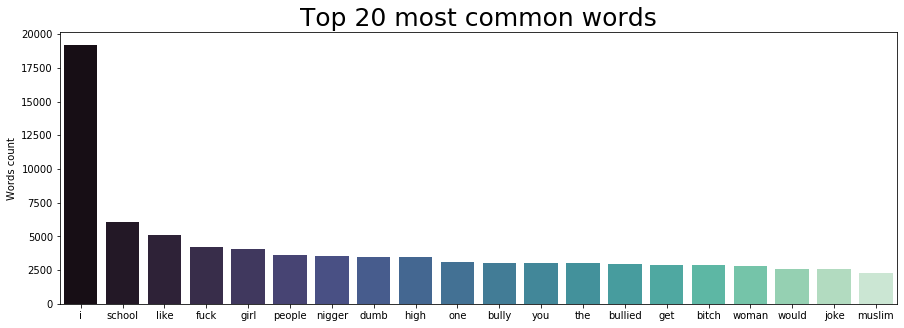

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(keys, values, palette='mako')
plt.title('Top 20 most common words', size=25)
plt.ylabel("Words count")
plt.show()

# TF-IDF

In [ ]:
tf_idf = TfidfVectorizer()
x_train_tfidf = tf_idf.fit_transform(train_data["text"])

In [ ]:
print(x_train_tfidf[0])

  (0, 15983)	0.29162335152041846
  (0, 406)	0.3056360878827836
  (0, 10803)	0.19277761548480285
  (0, 4707)	0.16847278826790296
  (0, 24781)	0.33135475918884083
  (0, 20663)	0.33135475918884083
  (0, 21851)	0.35333793868697155
  (0, 29139)	0.340478603033943
  (0, 22018)	0.340478603033943
  (0, 278)	0.340478603033943
  (0, 1619)	0.25254588504142006


In [ ]:
print("n_samples: %d, n_features: %d" % x_train_tfidf.shape)

n_samples: 50724, n_features: 38206


In [ ]:
x_validation_tfidf = tf_idf.transform(x_val)
x_test_tfidf = tf_idf.transform(x_test)

In [ ]:
print("validation: n_samples: %d, n_features: %d" % x_validation_tfidf.shape)
print("test: n_samples: %d, n_features: %d" % x_test_tfidf.shape)

validation: n_samples: 6290, n_features: 38206
test: n_samples: 6290, n_features: 38206


# padding

## sparse padding

### pre_padding

In [ ]:
prepad_train = pad_sequences(x_train_encode, padding='pre', truncating='post', maxlen=40)
prepad_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,  1551, 13289, 13290, 13291, 18603,  3272,  8019,
          96,   260,   987,  1478], dtype=int32)

In [ ]:
prepad_test = pad_sequences(x_test_encode, padding='pre', truncating='post', maxlen=40)
prepad_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 2318, 4903,   79, 3472, 5505, 3472,  242,   35,
         36,   52, 1771,  339,  169,  267,   46,  564,  806, 4870,   93,
       6651, 3249,   35, 3253,  284,   73, 1293], dtype=int32)

In [ ]:
prepad_validation = pad_sequences(x_validation_encode, padding='pre', truncating='post', maxlen=40)
prepad_validation[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, 7681,  960,  237,
       1485, 4318,   50,  510, 8068,   33,  426], dtype=int32)

### post_padding

In [ ]:
postpad_train = pad_sequences(x_train_encode, padding='post', truncating='post', maxlen=40)
postpad_train[0]

array([ 1591, 14930, 14931, 14932, 20770, 11935, 11936,    93,   230,
        6538,  4624,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0], dtype=int32)

In [ ]:
postpad_test = pad_sequences(x_test_encode, padding='post', truncating='post', maxlen=40)
postpad_test[0]

array([    9,   755,  1694,  7801,    19,  4457,   665,  8112,  6792,
         492, 18144,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0], dtype=int32)

In [ ]:
postpad_validation = pad_sequences(x_validation_encode, padding='post', truncating='post', maxlen=40)
postpad_validation[0]

array([ 58, 274,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0], dtype=int32)

# Prepare data for cross validation

In [ ]:
x_train_validation = sp.sparse.vstack([x_train_tfidf,x_validation_tfidf])
x_train_validation.shape

(57014, 38206)

In [ ]:
y_train_validation = y_train.copy()
y_train_validation.extend(y_val)
len(y_train_validation)
print(len(y_train))

50724


In [ ]:
validation_split=PredefinedHoldoutSplit(valid_indices=[i for i in range(len(y_train),len(y_train_validation))])

# Model evaluation

In [ ]:
def model_evaluation(y_test, y_predict):
  print("accuracy: ", metrics.accuracy_score(y_test, y_predict))
  print("Precision: ", metrics.precision_score(y_test, y_predict))
  print("recall: ", metrics.recall_score(y_test, y_predict))
  print("f1-score:", metrics.f1_score(y_test, y_predict))
  print("confision matrix: \n" , confusion_matrix(y_test, y_predict))
  print("classification_report: \n", classification_report(y_test, y_predict))


#ROC curve

In [ ]:
def ROC_curve(fpr,tpr):

    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
    print('AUC: {}'.format(auc(fpr, tpr)))
    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve area{}' ''.format(auc(fpr,tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--' )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# SVM model


In [ ]:
param_grid_svm=[
                {'C':[1,10] ,'kernel': ['linear']},
                {'C':[1,10] ,'kernel': ['rbf'],'gamma':[0.01,  0.0001]},
                {'C':[1,10] ,'kernel': ['poly'],'gamma':[ 0.01, 0.0001],
                 'degree':[4,6,8]},
                {'C':[1,10] ,'kernel': ['sigmoid'],'gamma':[0.01,  0.0001]}
]

In [ ]:
grid_svm_model=GridSearchCV(estimator=svm.SVC(),param_grid=param_grid_svm,cv=validation_split)
grid_svm_model.fit(x_train_validation, y_train_validation)

In [ ]:
means_svm=grid_svm_model.cv_results_['mean_test_score']
parameter_svm=grid_svm_model.cv_results_['params']
for mean,parameter in zip(means_svm,parameter_svm):
   print("%f with: %r" % (mean, parameter))

0.926717 with: {'C': 1, 'kernel': 'linear'}
0.927832 with: {'C': 10, 'kernel': 'linear'}
0.865541 with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.542138 with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.913494 with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.575116 with: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.502629 with: {'C': 1, 'degree': 4, 'gamma': 0.01, 'kernel': 'poly'}
0.528756 with: {'C': 1, 'degree': 4, 'gamma': 0.0001, 'kernel': 'poly'}
0.502469 with: {'C': 1, 'degree': 6, 'gamma': 0.01, 'kernel': 'poly'}
0.884021 with: {'C': 1, 'degree': 6, 'gamma': 0.0001, 'kernel': 'poly'}
0.506452 with: {'C': 1, 'degree': 8, 'gamma': 0.01, 'kernel': 'poly'}
0.865222 with: {'C': 1, 'degree': 8, 'gamma': 0.0001, 'kernel': 'poly'}
0.502629 with: {'C': 10, 'degree': 4, 'gamma': 0.01, 'kernel': 'poly'}
0.502629 with: {'C': 10, 'degree': 4, 'gamma': 0.0001, 'kernel': 'poly'}
0.502469 with: {'C': 10, 'degree': 6, 'gamma': 0.01, 'kernel': 'poly'}
0.884021 with: {'C': 10, 'degree': 6, 'g

In [ ]:
grid_svm_model.best_params_

{'C': 10, 'kernel': 'linear'}

In [ ]:
best_svm_model=svm.SVC(C=10,kernel='linear')
best_svm_model.fit(x_train_tfidf,y_train)

SVC(C=10, kernel='linear')

In [ ]:
y_predict_svm = best_svm_model.predict(x_test_tfidf)

In [ ]:
np.savetxt("svmc=10,kernel=linear.csv", y_predict_svm, delimiter=",")

In [ ]:
np.savetxt("svmc=10,kernel=linear,test.csv", y_test, delimiter=",")

In [ ]:
best_model_svm_name = 'best_svm_model.sav'
pickle.dump(best_svm_model, open(best_model_svm_name, 'wb'))

## SVM model evaluation

In [ ]:
model_evaluation(y_test, y_predict_svm)

accuracy:  0.918273060379162
Precision:  0.929305912596401
recall:  0.9080062794348509
f1-score: 0.918532634587899
confision matrix: 
 [[2872  220]
 [ 293 2892]]
classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      3092
           1       0.93      0.91      0.92      3185

    accuracy                           0.92      6277
   macro avg       0.92      0.92      0.92      6277
weighted avg       0.92      0.92      0.92      6277



AUC: 0.9184274605453685


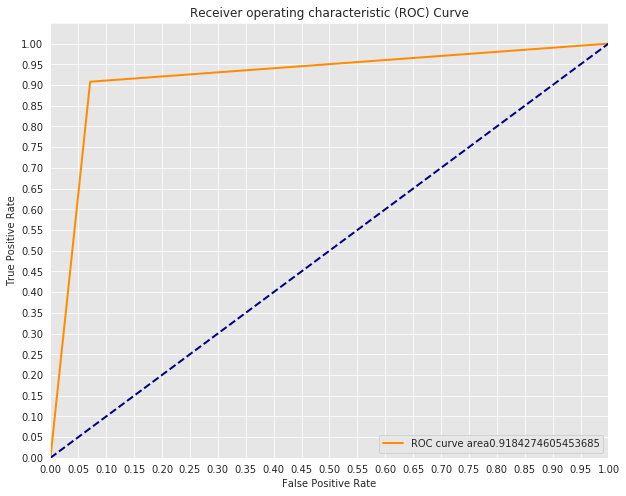

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_svm)
ROC_curve(fpr,tpr)

#Random Forest model

In [ ]:
param_grid_randomforest = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
}

In [ ]:
grid_randomforest_model=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid_randomforest,cv=validation_split)
grid_randomforest_model.fit(x_train_validation, y_train_validation)

GridSearchCV(cv=<mlxtend.evaluate.holdout.PredefinedHoldoutSplit object at 0x7f7b5e8611d0>,
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500]})

In [ ]:
means_randomforest=grid_randomforest_model.cv_results_['mean_test_score']
parameter_randomforest=grid_randomforest_model.cv_results_['params']
for mean,parameter in zip(means_randomforest,parameter_randomforest):
   print("%f with: %r" % (mean, parameter))

0.861239 with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.838936 with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300}
0.862833 with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 400}
0.855664 with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.772662 with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.788275 with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 300}
0.804047 with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 400}
0.839414 with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.838776 with: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
0.848654 with: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}
0.854389 with: {'cri

In [ ]:
grid_randomforest_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [ ]:
best_randomforest_model = RandomForestClassifier(n_estimators =200 , max_depth = 4, max_features = 'sqrt', criterion ='gini' )
best_randomforest_model.fit(x_train_tfidf,y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=200)

In [ ]:
y_predict_randomforest = best_randomforest_model.predict(x_test_tfidf)

In [ ]:
np.savetxt("my_output_file_randomforest.csv", y_predict_randomforest, delimiter=",")

In [ ]:
best_model_randomforest_name = 'best_randomforest_model.sav'
pickle.dump(best_randomforest_model, open(best_model_randomforest_name, 'wb'))

## Randomforest model evaluation

In [ ]:
model_evaluation(y_test, y_predict_randomforest)

accuracy:  0.836546120758324
Precision:  0.9552931252636019
recall:  0.7111459968602826
f1-score: 0.8153347732181426
confision matrix: 
 [[2986  106]
 [ 920 2265]]
classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.97      0.85      3092
           1       0.96      0.71      0.82      3185

    accuracy                           0.84      6277
   macro avg       0.86      0.84      0.83      6277
weighted avg       0.86      0.84      0.83      6277



AUC: 0.8516235243226556


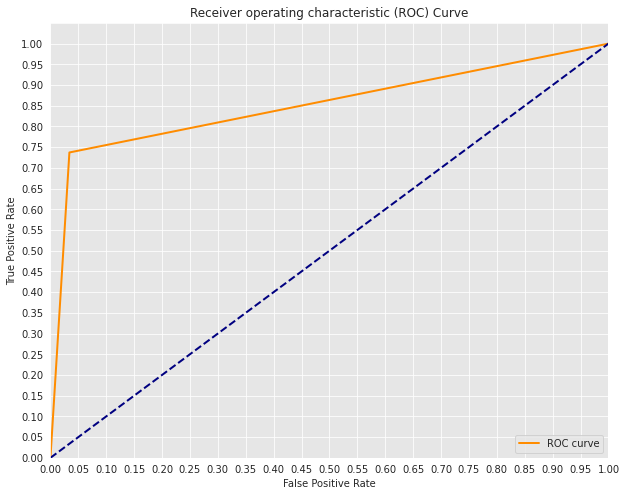

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_randomforest)
ROC_curve(fpr,tpr)

# BERT

## Cuda RunTime

In [ ]:
torch.cuda.empty_cache()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda
CUDA is available!  Training on GPU ...


## Model Name Bert

In [ ]:
bert_model_name='bert-base-uncased'

## Prepare data

In [ ]:
x_train = train_data.text.values
y_train = train_data.label.values
x_test = x_test_df.values
y_test = y_test_df.values
x_validation = x_val_df.values
y_validation = y_val_df.values

In [ ]:
max_len=40
batch_size=16
learning_rate=2e-7
epochs=3


In [ ]:
label2id = {"Bully" : 1, "Not_Bully": 0}
id2label = {1: "Bully", 0: "Not_Bully"}

In [ ]:
config = BertConfig.from_pretrained(bert_model_name, **{"label2id": label2id, "id2label": id2label})

In [ ]:
tokenizer = BertTokenizer.from_pretrained(bert_model_name,padding_side='left',truncation_side ="right")

In [ ]:
encoded_x_train = []
mask_x_train = []
for tweet in x_train:
   encoded_dic = tokenizer.encode_plus(tweet, add_special_tokens=True, max_length=max_len, pad_to_max_length = True, truncation=True, return_attention_mask=True, return_tensors='pt')
   encoded_x_train.append(encoded_dic['input_ids'])
   mask_x_train.append(encoded_dic['attention_mask'])

encoded_x_train = torch.cat(encoded_x_train, dim=0)
mask_x_train = torch.cat(mask_x_train, dim=0)
y_train = torch.tensor(y_train)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2329: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
encoded_x_test = []
mask_x_test = []
for tweet in x_test:
   encoded_dic = tokenizer.encode_plus(tweet, add_special_tokens=True, max_length=max_len, pad_to_max_length = True, truncation=True, return_attention_mask=True, return_tensors='pt')
   encoded_x_test.append(encoded_dic['input_ids'])
   mask_x_test.append(encoded_dic['attention_mask'])

encoded_x_test = torch.cat(encoded_x_test, dim=0)
mask_x_test = torch.cat(mask_x_test, dim=0)
y_test = torch.tensor(y_test)

In [ ]:
encoded_x_val = []
mask_x_val = []
for tweet in x_validation:
   encoded_dic = tokenizer.encode_plus(tweet, add_special_tokens=True, max_length=max_len, pad_to_max_length = True, truncation=True, return_attention_mask=True, return_tensors='pt')
   encoded_x_val.append(encoded_dic['input_ids'])
   mask_x_val.append(encoded_dic['attention_mask'])

encoded_x_val = torch.cat(encoded_x_val, dim=0)
mask_x_val = torch.cat(mask_x_val, dim=0)
y_val = torch.tensor(y_validation)

In [ ]:
print(encoded_x_train.shape)
print(encoded_x_test.shape)
print(encoded_x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

torch.Size([50724, 40])
torch.Size([6290, 40])
torch.Size([6290, 40])
torch.Size([50724])
torch.Size([6290])
torch.Size([6290])


In [ ]:
train_dataset = TensorDataset(encoded_x_train, mask_x_train, y_train)
test_dataset = TensorDataset(encoded_x_test, mask_x_test, y_test)
validation_dataset = TensorDataset(encoded_x_val, mask_x_val, y_val)

In [ ]:
train_batch = DataLoader(train_dataset, sampler = RandomSampler(train_dataset), batch_size = batch_size)
test_batch = DataLoader(test_dataset, sampler = RandomSampler(test_dataset), batch_size = batch_size)
validation_batch = DataLoader(validation_dataset, sampler = RandomSampler(validation_dataset), batch_size = batch_size)

## Train model

In [ ]:
model = BertForSequenceClassification.from_pretrained(bert_model_name, config=config, ignore_mismatched_sizes=True)
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
optimizer = AdamW(model.parameters(), lr = learning_rate)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
total_steps = len(train_batch) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0, num_training_steps = total_steps)

In [ ]:
def accuracy(y_predict, labels):
  y_pre = np.argmax(y_predict, axis=1).flatten()
  labels = labels.flatten()
  return (np.sum(y_pre == labels) / (len(labels)))

In [ ]:
valid_acc_max=0

train_losses , valid_losses = [] , []
for e in range(0, epochs):
    total_train_accuracy = 0
    total_train_loss = 0
    model.train()
    for batch in train_batch:
        encoded_batch_x_train = batch[0].to(device)
        mask_batch_x_train = batch[1].to(device)
        labels_batch_x_train = batch[2].to(device)
        model.zero_grad()
        result = model(encoded_batch_x_train,
                       token_type_ids=None,
                       attention_mask=mask_batch_x_train,
                       labels=labels_batch_x_train,
                       return_dict=True)

        loss = result.loss
        logits = result.logits
        total_train_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = labels_batch_x_train.to('cpu').numpy()
        total_train_accuracy += accuracy(logits, label_ids)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_batch)
    avg_train_acc =   total_train_accuracy / len(train_batch)
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in validation_batch:
        encoded_batch_x_validation = batch[0].to(device)
        mask_batch_x_validation = batch[1].to(device)
        labels_batch_x_validation = batch[2].to(device)
        with torch.no_grad():
            result = model(encoded_batch_x_validation,
                           token_type_ids=None,
                           attention_mask=mask_batch_x_validation,
                           labels=labels_batch_x_validation,
                           return_dict=True)

        loss = result.loss
        logits = result.logits
        total_eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = labels_batch_x_validation.to('cpu').numpy()
        total_eval_accuracy += accuracy(logits, label_ids)


    avg_val_accuracy = total_eval_accuracy / len(validation_batch)
    avg_val_loss = total_eval_loss / len(validation_batch)
    train_losses.append(avg_train_loss)
    valid_losses.append(avg_val_loss)

    if avg_val_accuracy >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {avg_val_accuracy:.6f}).  Saving model ...')
        valid_acc_max = avg_val_accuracy

    train_losses.append(avg_train_loss)
    valid_losses.append( avg_val_loss)
    print(f'\tTrain_loss : {avg_train_loss:.4f} Val_loss : { avg_val_loss:.4f}')
    print(f'\tTrain_acc : {avg_train_acc:.3f}% Val_acc : {avg_val_accuracy:.3f}%')

Epoch 1:Validation accuracy increased (0.000000 --> 0.830312).  Saving model ...
	Train_loss : 0.5300 Val_loss : 0.4266
	Train_acc : 0.752% Val_acc : 0.830%
Epoch 2:Validation accuracy increased (0.830312 --> 0.850668).  Saving model ...
	Train_loss : 0.4106 Val_loss : 0.3878
	Train_acc : 0.835% Val_acc : 0.851%
Epoch 3:Validation accuracy increased (0.850668 --> 0.855503).  Saving model ...
	Train_loss : 0.3854 Val_loss : 0.3751
	Train_acc : 0.845% Val_acc : 0.856%


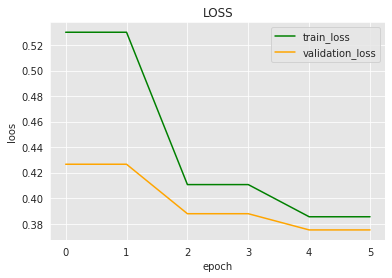

In [ ]:
plt.plot(train_losses,'green', label='train_loss')
plt.plot(valid_losses,'orange',label='validation_loss')
plt.xlabel('epoch')
plt.ylabel('loos')
plt.title('LOSS')
plt.legend()
plt.show()

##testing model

In [ ]:
model.load_state_dict(torch.load('./state_dict.pt'))

<All keys matched successfully>

In [ ]:
model.eval()
y_pred_list = []
y_test_list = []
for batch in test_batch:
    encoded_batch_x_test = batch[0].to(device)
    mask_batch_x_test = batch[1].to(device)
    labels_batch_x_test = batch[2].to(device)
    result = model(encoded_batch_x_test,
                            token_type_ids=None,
                            attention_mask=mask_batch_x_test,
                            labels=labels_batch_x_test,
                            return_dict=True)

    logits = result.logits
    logits = logits.detach().cpu().numpy()
    label_ids = labels_batch_x_test.to('cpu').numpy()
    logits = np.argmax(logits, axis=1).flatten()
    label_ids = label_ids.flatten()
    y_pred_list.extend(logits)

AUC: 0.8525428969478129


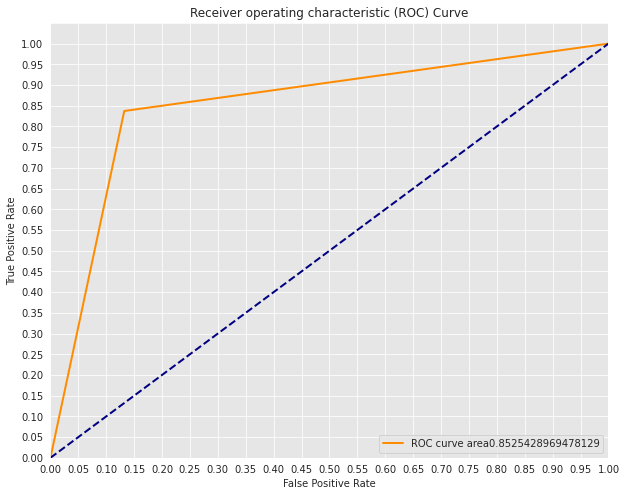

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_list,y_pred_list)
ROC_curve(fpr,tpr)

In [ ]:
np.savetxt("my_output_file_bert.csv", y_pred_list, delimiter=",")

In [ ]:
np.savetxt("my_test_file_bert.csv", y_test_list, delimiter=",")

In [ ]:
model_evaluation(y_test_list, y_pred_list)

accuracy:  0.8523179862991875
Precision:  0.86703511053316
recall:  0.8373626373626374
f1-score: 0.8519405845711547
confision matrix: 
 [[2683  409]
 [ 518 2667]]
classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      3092
           1       0.87      0.84      0.85      3185

    accuracy                           0.85      6277
   macro avg       0.85      0.85      0.85      6277
weighted avg       0.85      0.85      0.85      6277



# Bi-Lstm


##Cuda Run Time

In [ ]:
torch.cuda.empty_cache()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda
CUDA is available!  Training on GPU ...


## Word Embedding by Glove

In [ ]:
!unzip -xq /content/drive/MyDrive/WordEmbedding/glove.twitter.27B.zip

replace glove.twitter.27B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: غ
error:  invalid response [غ]
replace glove.twitter.27B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
glove_dir="/content/glove.twitter.27B.100d.txt"
embedding_index={}
with open(glove_dir,'r') as f:
  lines=f.readlines()
  for line in lines:
    word=line.split()[0]
    embedding_vector=np.asarray(line.split()[1:],dtype='float32')
    embedding_index[word]=embedding_vector

In [ ]:
vocab_size=len(tokenizer.word_index)+1
embedding_dim=100
embedding_matrix=np.zeros((vocab_size,embedding_dim))
for word , i in tokenizer.word_index.items():
     embedding_vector = embedding_index.get(word)
     if embedding_vector is not None:
       embedding_matrix[i]=embedding_vector

## Model Bi-Lstm

In [ ]:
train_data_tensor = TensorDataset(torch.from_numpy(prepad_train), torch.from_numpy(np.asarray(train_data["label"],dtype='float32')))
test_data_tensor = TensorDataset(torch.from_numpy(prepad_test), torch.from_numpy(np.asarray(y_test_df,dtype='float32')))
valid_data_tensor = TensorDataset(torch.from_numpy(prepad_validation), torch.from_numpy(np.asarray(y_val_df,dtype='float32')))

In [ ]:
batch_size = 32

In [ ]:
train_loader = DataLoader(train_data_tensor, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data_tensor, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data_tensor, shuffle=True, batch_size=batch_size)

In [ ]:
num_classes = 1
hidden_dim = 100
lstm_layers = 1
lr = 3e-4
dropout = 0.5
bidirectional = True
epochs = 3

In [ ]:
class BiLSTM_CyberBully_Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional,batch_size, dropout):
        super().__init__()
        self.lstm_layers = lstm_layers
        self.num_directions = 2 if bidirectional else 1
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.batch_size = batch_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=lstm_layers,
                            dropout=dropout,
                            bidirectional=bidirectional,
                            batch_first=True)

        self.fc = nn.Linear(hidden_dim*self.num_directions, num_classes)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x, hidden):
        self.batch_size = x.size(0)
        embedded = self.embedding(x)
        out, hidden = self.lstm(embedded, hidden)
        out = out[:,-1,:]
        out = self.fc(out)
        out = self.sigmoid(out)
        return out, hidden

    def init_hidden(self, batch_size):
        h0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(device)
        c0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(device)
        hidden = (h0, c0)
        return hidden

In [ ]:
model = BiLSTM_CyberBully_Classifier(vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional, batch_size, dropout)
model = model.to(device)
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
model.embedding.weight.requires_grad=True
print(model)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


BiLSTM_CyberBully_Classifier(
  (embedding): Embedding(33502, 100)
  (lstm): LSTM(100, 100, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=200, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


## Training Model

In [ ]:
criterion = nn.functional.binary_cross_entropy
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay = 5e-6)

In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 4
early_stopping_counter = 0

valid_acc_max = 0
train_losses, valid_losses = [] , []

for e in range(epochs):

    train_loss, valid_loss  = [], []
    train_acc, valid_acc  = [], []
    y_train_list, y_val_list = [], []
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0


    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        h = model.init_hidden(labels.size(0))
        model.zero_grad()
        output, h = model(inputs,h)
        output = output.squeeze()

        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss.item()
        optimizer.step()

        y_pred_train = torch.Tensor([1 if x >= 0.5 else 0 for x in output]).to(device)

        y_train_list.extend(y_pred_train.tolist())
        correct += torch.sum(y_pred_train==labels).item()
        total += labels.size(0)

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    with torch.no_grad():

        model.eval()

        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)
            output = output.squeeze()

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.Tensor([1 if x>= 0.5 else 0 for x in output]).to(device)
            y_val_list.extend(y_pred_val.tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1

    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    train_losses.append(np.mean(train_loss))
    valid_losses.append(np.mean(valid_loss))
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')




Epoch 1:Validation accuracy increased (0.000000 --> 91.652063).  Saving model ...
	Train_loss : 0.2913 Val_loss : 0.2317
	Train_acc : 88.113% Val_acc : 91.652%
Epoch 2:Validation accuracy increased (91.652063 --> 92.560140).  Saving model ...
	Train_loss : 0.2001 Val_loss : 0.2011
	Train_acc : 92.395% Val_acc : 92.560%
Epoch 3:Validation accuracy increased (92.560140 --> 92.942488).  Saving model ...
	Train_loss : 0.1617 Val_loss : 0.1943
	Train_acc : 93.911% Val_acc : 92.942%


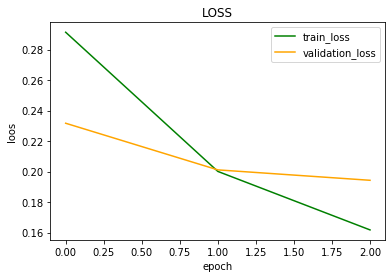

In [ ]:
plt.plot(train_losses,'green', label='train_loss')
plt.plot(valid_losses,'orange',label='validation_loss')
plt.xlabel('epoch')
plt.ylabel('loos')
plt.title('LOSS')
plt.legend()
plt.show()

##testing model

In [ ]:
model.load_state_dict(torch.load('./state_dict.pt'))

<All keys matched successfully>

In [ ]:
model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    test_h = model.init_hidden(labels.size(0))

    output, val_h = model(inputs, test_h)
    output = output.squeeze()
    y_pred_test = torch.Tensor([1 if x >= 0.5 else 0 for x in output]).to(device)
    y_pred_list.extend(y_pred_test.tolist())
    y_test_list.extend(labels.tolist())

In [ ]:
model_evaluation(y_test_list, y_pred_list)

accuracy:  0.9238489724390633
Precision:  0.9317384370015949
recall:  0.9171114599686028
f1-score: 0.9243670886075949
confision matrix: 
 [[2878  214]
 [ 264 2921]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      3092
         1.0       0.93      0.92      0.92      3185

    accuracy                           0.92      6277
   macro avg       0.92      0.92      0.92      6277
weighted avg       0.92      0.92      0.92      6277



AUC: 0.923950296607846


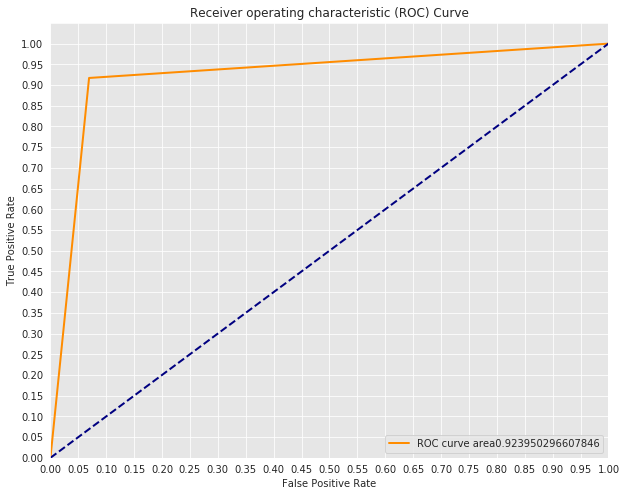

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_list,y_pred_list)
ROC_curve(fpr,tpr)

In [ ]:
np.savetxt("my_output_file_bilstm.csv", y_pred_list, delimiter=",")

# RNN

## Cuda Run Time

In [ ]:
torch.cuda.empty_cache()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda
CUDA is available!  Training on GPU ...


## Embedding Glove

In [ ]:
!unzip -xq /content/drive/MyDrive/WordEmbedding/glove.twitter.27B.zip

In [ ]:
glove_dir="/content/glove.twitter.27B.100d.txt"
embedding_index={}
with open(glove_dir,'r') as f:
  lines=f.readlines()
  for line in lines:
    word=line.split()[0]
    embedding_vector=np.asarray(line.split()[1:],dtype='float32')
    embedding_index[word]=embedding_vector

In [ ]:
vocab_size=len(tokenizer.word_index)+1
embedding_dim=100
embedding_matrix=np.zeros((vocab_size,embedding_dim))
for word , i in tokenizer.word_index.items():
     embedding_vector = embedding_index.get(word)
     if embedding_vector is not None:
       embedding_matrix[i]=embedding_vector

## Model RNN

In [ ]:
train_data_tensor = TensorDataset(torch.from_numpy(prepad_train), torch.from_numpy(np.asarray(train_data["label"],dtype='float32')))
test_data_tensor = TensorDataset(torch.from_numpy(prepad_test), torch.from_numpy(np.asarray(y_test_df,dtype='float32')))
valid_data_tensor = TensorDataset(torch.from_numpy(prepad_validation), torch.from_numpy(np.asarray(y_val_df,dtype='float32')))

In [ ]:
batch_size = 32

In [ ]:
train_loader = DataLoader(train_data_tensor, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data_tensor, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data_tensor, shuffle=True, batch_size=batch_size)

In [ ]:
num_classes = 1
hidden_dim = 70
rnn_layers = 1
lr = 3e-4
dropout = 0.5
epochs = 10
pos=22956
neg=12299

In [ ]:
class RNN_CyberBully_Classifier(nn.Module):
    def __init__(self, input_size, hidden_dim, num_classes, rnn_layers,batch_size,embedding_dim,dropout,initial_bias=None):
       super().__init__()
       self.initial_bias=initial_bias
       self.batch_size=batch_size
       self.rnn_layers=rnn_layers
       self.hidden_dim=hidden_dim
       self.embedding=nn.Embedding(input_size,embedding_dim)
       self.rnn=nn.RNN(embedding_dim, hidden_dim, rnn_layers,batch_first=True,dropout=dropout)
       self.linear=nn.Linear(hidden_dim,num_classes)
       self.sigmoid=nn.Sigmoid()

    def forward(self,x,hidden):
        self.batch_size=x.size(0)
        embed=self.embedding(x)
        output, h =self.rnn(embed,hidden)
        output=output[:,-1,:]
        output=self.linear(output)
        output=self.sigmoid(output)
        return output , h

    def init_hidden(self, batch_size):
        h0 = torch.zeros((self.rnn_layers, batch_size, self.hidden_dim)).detach().to(device)
        return h0



In [ ]:
model = RNN_CyberBully_Classifier(len(tokenizer.word_index)+1,hidden_dim,num_classes,rnn_layers,batch_size,embedding_dim,dropout)
model.to(device)
print(model)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


RNN_CyberBully_Classifier(
  (embedding): Embedding(34916, 100)
  (rnn): RNN(100, 70, batch_first=True, dropout=0.5)
  (linear): Linear(in_features=70, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


## Training Model

In [ ]:
#loss function for imbalance data
def weighted_binary_cross_entropy(output, target, weights=None):

        loss = -1 * torch.mean(weights[1] * (target * torch.log(output)) + weights[0] * ((1 - target) * torch.log(1 - output)))
        return loss

In [ ]:
weights = [0.53, 8.44]
criterion = nn.functional.binary_cross_entropy
#criterion = weighted_binary_cross_entropy
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay = 5e-6)

In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 4
early_stopping_counter = 0

valid_acc_max = 0
train_losses, valid_losses = [], []

for e in range(epochs):

    train_loss, valid_loss  = [], []
    train_acc, valid_acc  = [], []
    y_train_list, y_val_list = [], []
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0


    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        h = model.init_hidden(labels.size(0))
        model.zero_grad()
        output, h = model(inputs,h)
        output = output.squeeze()

        loss = criterion(output, labels)
        #loss = criterion(output, labels, weights)
        loss.backward()
        running_loss += loss.item()
        optimizer.step()

        y_pred_train = torch.Tensor([1 if x >= 0.5 else 0 for x in output]).to(device)

        y_train_list.extend(y_pred_train.tolist())
        correct += torch.sum(y_pred_train==labels).item()
        total += labels.size(0)

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)


    with torch.no_grad():

        model.eval()

        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)
            output = output.squeeze()

            val_loss = criterion(output, labels)
            #val_loss = criterion(output, labels, weights)
            running_loss_val += val_loss.item()

            y_pred_val = torch.Tensor([1 if x>= 0.5 else 0 for x in output]).to(device)
            y_val_list.extend(y_pred_val.tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1

    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    train_losses.append(np.mean(train_loss))
    valid_losses.append(np.mean(valid_loss))
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')

Epoch 1:Validation accuracy increased (0.000000 --> 86.502385).  Saving model ...
	Train_loss : 0.4292 Val_loss : 0.3421
	Train_acc : 80.500% Val_acc : 86.502%
Epoch 2:Validation accuracy increased (86.502385 --> 89.507154).  Saving model ...
	Train_loss : 0.2764 Val_loss : 0.2788
	Train_acc : 89.719% Val_acc : 89.507%
Epoch 3:Validation accuracy increased (89.507154 --> 89.936407).  Saving model ...
	Train_loss : 0.2313 Val_loss : 0.2706
	Train_acc : 91.594% Val_acc : 89.936%
Epoch 4:Validation accuracy increased (89.936407 --> 90.842607).  Saving model ...
	Train_loss : 0.2002 Val_loss : 0.2472
	Train_acc : 92.786% Val_acc : 90.843%
Epoch 5:Validation accuracy increased (90.842607 --> 91.478537).  Saving model ...
	Train_loss : 0.1745 Val_loss : 0.2390
	Train_acc : 93.717% Val_acc : 91.479%
Epoch 6:Validation accuracy increased (91.478537 --> 91.907790).  Saving model ...
	Train_loss : 0.1524 Val_loss : 0.2370
	Train_acc : 94.557% Val_acc : 91.908%
Epoch 7:Validation accuracy did not

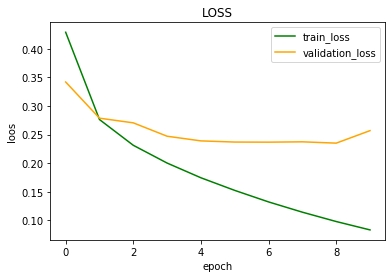

In [ ]:
plt.plot(train_losses,'green', label='train_loss')
plt.plot(valid_losses,'orange',label='validation_loss')
plt.xlabel('epoch')
plt.ylabel('loos')
plt.title('LOSS')
plt.legend()
plt.show()

## Testing model

In [ ]:
model.load_state_dict(torch.load('./state_dict.pt'))

<All keys matched successfully>

In [ ]:
model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    test_h = model.init_hidden(labels.size(0))

    output, val_h = model(inputs, test_h)
    output = output.squeeze()
    y_pred_test = torch.Tensor([1 if x >= 0.5 else 0 for x in output]).to(device)
    y_pred_list.extend(y_pred_test.tolist())
    y_test_list.extend(labels.tolist())

AUC: 0.9272255292259084


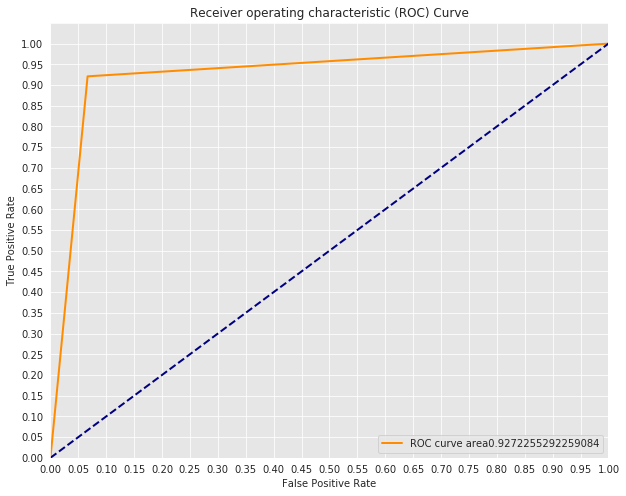

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_list,y_pred_list)
ROC_curve(fpr,tpr)

In [ ]:
np.savetxt("my_output_file_rnn_unbalnce_pre_lower_stopword_lancaster.csv", y_pred_list, delimiter=",")

In [ ]:
np.savetxt("my_test_file_rnn_unbalnce_pre_lower_stopword_lancaster.csv", y_test_list, delimiter=",")

In [ ]:
model_evaluation(y_test_list, y_pred_list)

accuracy:  0.9271860095389507
Precision:  0.9333973743195645
recall:  0.9210110584518167
f1-score: 0.9271628498727735
confision matrix: 
 [[2917  208]
 [ 250 2915]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      3125
         1.0       0.93      0.92      0.93      3165

    accuracy                           0.93      6290
   macro avg       0.93      0.93      0.93      6290
weighted avg       0.93      0.93      0.93      6290



#total Plots


In [ ]:
rnn_test=pd.read_csv("/content/rnn_pre_porter_stopword_test (1).csv",header=None)
rnn_pred=pd.read_csv("/content/rnn_pre_porter_stopword (1).csv",header=None)
print(len(rnn_test))
print(len(rnn_pred))
fprrnn, tprrnn, thresholdsrnn = roc_curve(rnn_test, rnn_pred)

6290
6290


In [ ]:
bert_test=pd.read_csv("/content/bert_pre_lower_lemma_test.csv",header=None)
bert_pred=pd.read_csv("/content/bert_pre_lower_lemma.csv",header=None)
print(len(bert_test))
print(len(bert_pred))
fprbert, tprbert, thresholdsbert = roc_curve(bert_test, bert_pred)

6297
6297


In [ ]:
bilstm_test=pd.read_csv("/content/bilstm9test_2.csv",header=None)
bilstm_pred=pd.read_csv("/content/bilstm9_2.csv",header=None)
print(len(bilstm_test))
print(len(bilstm_pred))
fprbilstm, tprbilstm, thresholdsbilstm = roc_curve(bilstm_test, bilstm_pred)

6290
6290


In [ ]:
svm_test=pd.read_csv("/content/svmc=1,kernel=linear,stopword,porter,test (1) (1).csv",header=None)
svm_pred=pd.read_csv("/content/svmc=1,kernel=linear,stopword,porter,predict  (1) (1).csv",header=None)
print(len(svm_test))
print(len(svm_pred))
fprsvm, tprsvm, thresholdssvm = roc_curve(svm_test, svm_pred)

6290
6290


In [ ]:
rf_test=pd.read_csv("/content/my_test_file_randomforest_porter_lower_stopword (1) (1).csv",header=None)
rf_pred=pd.read_csv("/content/my_output_file_randomforest_porte_lower_stopwor (2).csv",header=None)
print(len(rf_test))
print(len(rf_pred))
fprrf, tprrf, thresholdsrf = roc_curve(rf_test, rf_pred)

6277
6277


In [ ]:
def ROC_curve(fprsvm,tprsvm,fprrandomforest,tprrandomforest,fprbert,tprbert,fprrnn,tprrnn,fprbilstm,tprbilstm):
    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(fprsvm, tprsvm, color='darkorange',
             lw=lw,label='ROC curve  svm area {}' ''.format(auc(fprsvm,tprsvm)))
    plt.plot(fprrandomforest,tprrandomforest, color='green',
             lw=lw, label='ROC curve  random forest area {}' ''.format(auc(fprrandomforest,tprrandomforest)))
    plt.plot(fprbert, tprbert, color='blue',
             lw=lw,  label='ROC curve bert area {}' ''.format(auc(fprbert,tprbert)))
    plt.plot(fprrnn, tprrnn, color='red',
             lw=lw, label='ROC curve rnn area {}' ''.format(auc(fprrnn,tprrnn)))
    plt.plot(fprbilstm, tprbilstm, color='purple',
             lw=lw, label='ROC curve bilstm area {}' ''.format(auc(fprbilstm,tprbilstm)))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

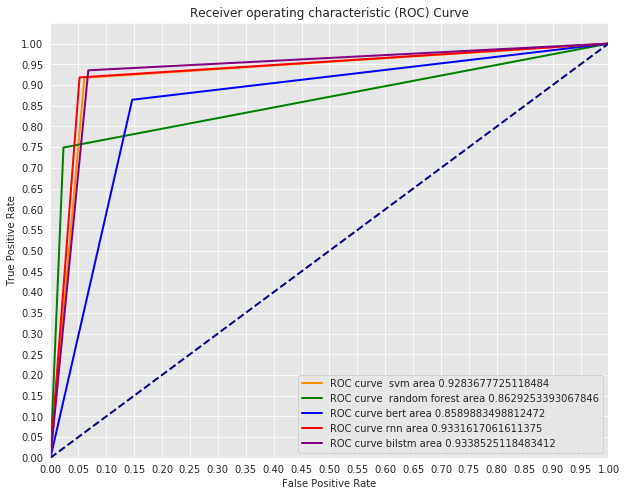

In [ ]:
ROC_curve(fprsvm, tprsvm,fprrf, tprrf,fprbert, tprbert,fprrnn, tprrnn,fprbilstm, tprbilstm)

In [ ]:
def model_evaluation(y_test, y_predict):
  print("accuracy: ", metrics.accuracy_score(y_test, y_predict))
  print("Precision: ", metrics.precision_score(y_test, y_predict))
  print("recall: ", metrics.recall_score(y_test, y_predict))
  print("f1-score:", metrics.f1_score(y_test, y_predict))
  print("confision matrix: \n" , confusion_matrix(y_test, y_predict))
  print("classification_report: \n", classification_report(y_test, y_predict))

In [ ]:
model_evaluation(rnn_test, rnn_pred)

accuracy:  0.9330683624801271
Precision:  0.9469055374592834
recall:  0.9184834123222749
f1-score: 0.9324779470729752
confision matrix: 
 [[2962  163]
 [ 258 2907]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      3125
         1.0       0.95      0.92      0.93      3165

    accuracy                           0.93      6290
   macro avg       0.93      0.93      0.93      6290
weighted avg       0.93      0.93      0.93      6290



In [ ]:
model_evaluation(bert_test, bert_pred)

accuracy:  0.8589804668889948
Precision:  0.8547169811320755
recall:  0.8645038167938931
f1-score: 0.8595825426944971
confision matrix: 
 [[2691  462]
 [ 426 2718]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      3153
         1.0       0.85      0.86      0.86      3144

    accuracy                           0.86      6297
   macro avg       0.86      0.86      0.86      6297
weighted avg       0.86      0.86      0.86      6297



In [ ]:
model_evaluation(bilstm_test, bilstm_pred)

accuracy:  0.9338632750397456
Precision:  0.9331862590608258
recall:  0.9355450236966825
f1-score: 0.9343641527295676
confision matrix: 
 [[2913  212]
 [ 204 2961]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      3125
         1.0       0.93      0.94      0.93      3165

    accuracy                           0.93      6290
   macro avg       0.93      0.93      0.93      6290
weighted avg       0.93      0.93      0.93      6290



In [ ]:
model_evaluation(svm_test, svm_pred)

accuracy:  0.9282988871224165
Precision:  0.9385908209437621
recall:  0.9175355450236967
f1-score: 0.9279437609841829
confision matrix: 
 [[2935  190]
 [ 261 2904]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      3125
         1.0       0.94      0.92      0.93      3165

    accuracy                           0.93      6290
   macro avg       0.93      0.93      0.93      6290
weighted avg       0.93      0.93      0.93      6290



In [ ]:
model_evaluation(rf_test, rf_pred)

accuracy:  0.8612394455950295
Precision:  0.9707078925956062
recall:  0.7491365777080062
f1-score: 0.8456494772284247
confision matrix: 
 [[3020   72]
 [ 799 2386]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.79      0.98      0.87      3092
         1.0       0.97      0.75      0.85      3185

    accuracy                           0.86      6277
   macro avg       0.88      0.86      0.86      6277
weighted avg       0.88      0.86      0.86      6277



Text(0, 0.5, 'evaluation metrics')

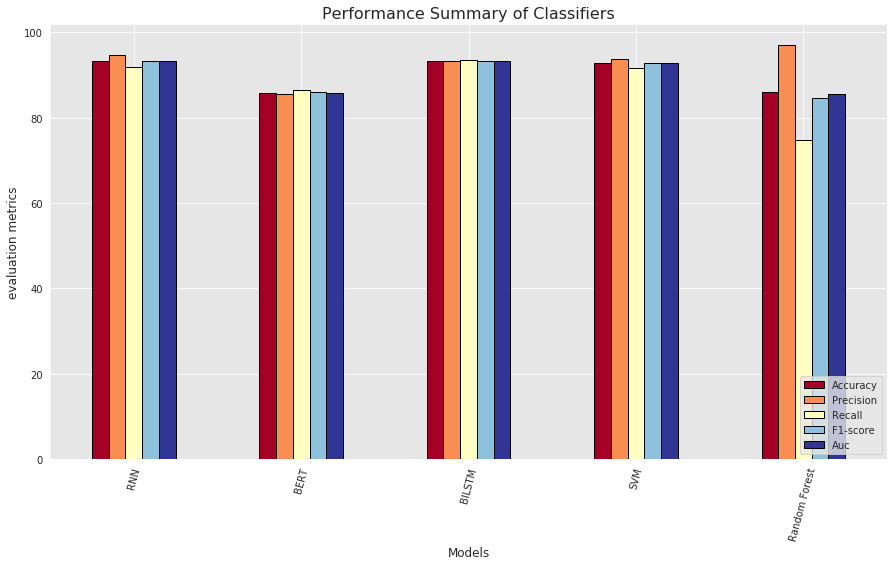

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[93.30,85.89,93.38,92.82,86.12],

    "Precision":[94.69,85.47,93.31,93.85,97.07],

    "Recall":[91.84,86.45,93.55,91.75,74.91],

    "F1-score":[93.24,85.95,93.43,92.79,84.56],

    "Auc":[93.31,85.89,93.38,92.83,85.50]},

    index=["RNN", "BERT", "BILSTM", "SVM","Random Forest"])

plotdata.plot(kind="bar",figsize=(15, 8),cmap = 'RdYlBu', edgecolor = "black")

plt.legend(loc = 'lower right')
plt.xticks(rotation=75)
plt.title("Performance Summary of Classifiers",fontdict={'fontsize': 16})

plt.xlabel("Models",fontdict={'fontsize': 12})

plt.ylabel("evaluation metrics",fontdict={'fontsize': 12})